## CodeCademy Project: Roller Coaster

Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

Roller coasters are often split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in 'Golden_Ticket_Award_Winners_Wood.csv' and 'Golden_Ticket_Award_Winners_Steel.csv', respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [1]:
#First, we import both pandas and matplotlib
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Load rankings data here:
df_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
df_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')


In [3]:
#Let's inspect the wood DataFrame first:
df_wood.head(10)

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013
5,6,Ravine Flyer II,Waldameer,"Erie, Pa.",Gravity Group,2008,712,2013
6,7,Outlaw Run,Silver Dollar City,"Branson, Mo.",Rocky Mountain,2013,599,2013
7,8,The Beast,Kings Island,"Kings Mills, Ohio",KECO,1979,555,2013
8,9,Lightning Racer,Hersheypark,"Hershey, Pa.",GCII,2000,364,2013
9,10,Shivering Timbers,Michigan’s Adventure,"Muskegon, Mich.",CCI,1998,304,2013


In [4]:
#It could be useful to print the DataFrame's information to know how many entries it has
df_wood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      179 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


In [5]:
#We can find that there is one row in the first DataFrame, that has no Supplier. Let's search which is its name.
df_wood[df_wood.Supplier.isnull()].reset_index()

,index,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,125,46,Grizzly (KD),Kings Dominion,"Doswell, Va.",NaN,1982,81,2017


In [6]:
#Now, we can do the same with the second DataFrame
df_steel.head(5)

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


In [7]:
df_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      180 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


In [8]:
#We can search how many Suppliers are in this rankings
print(df_steel.Supplier.nunique())

15


In [9]:
#We can also check if some years we have more rankings in our DataFrames
df_steel.groupby('Year of Rank').Rank.count()

Year of Rank
2013    10
2014    10
2015    10
2016    50
2017    50
2018    50
Name: Rank, dtype: int64

In [10]:
#As we saw above, from 2016 the rankings contain 50 rows, while in the previous years we have only 10.
#The same happens to the Wood DataFrame
df_wood.groupby('Year of Rank').Name.count()

Year of Rank
2013    10
2014    10
2015    10
2016    50
2017    50
2018    50
Name: Name, dtype: int64

In [11]:
#If we look at the DataFrames, we can question ourself which is the park with more appearances in the rankings. 
#We can find out this information here:
#First, with the wood rankings
park_rankings_wood = df_wood.groupby('Park').Name.count()
park_rankings_wood.sort_values(inplace=True, ascending=False)
print(park_rankings_wood.head(5))

Park
Knoebels Amusement Resort    12
Holiday World                12
Dollywood                     9
Six Flags St. Louis           9
Kings Island                  8
Name: Name, dtype: int64


In [12]:
#We can do the same with whe steel rankings
park_rankings_steel = df_steel.groupby('Park').Name.count()
park_rankings_steel.sort_values(inplace=True, ascending=False)
print(park_rankings_steel.head(5))

Park
Cedar Point                   19
Busch Gardens Williamsburg    12
Carowinds                     10
Six Flags New England          9
Busch Gardens Tampa            9
Name: Name, dtype: int64


In [13]:
#Finally, we need to show the winner of each year. We begin with the wood rankings:
df_wood[df_wood.Rank==1].reset_index()


,index,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,10,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1480,2014
2,20,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1625,2015
3,30,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",Custom Coasters,2000,1216,2016
4,80,1,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2009,1241,2017
5,130,1,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",PTC/Schmeck-Dinn,1985,1330,2018


In [14]:
#We can show the winners of the steel rankings too:
df_steel[df_steel.Rank==1].reset_index()

,index,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,10,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1139,2014
2,20,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1205,2015
3,30,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1126,2016
4,80,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1354,2017
5,130,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1222,2018


Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster’s name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with "El Toro" as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

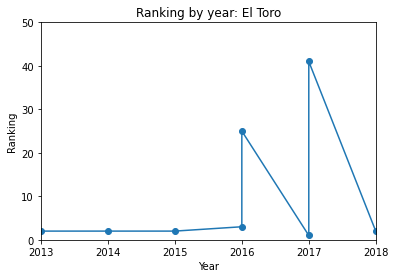

In [15]:
#We may want to rename the 'Year of Rank' column, so it is easier for us to create the function later:
df_steel.rename(columns= {'Year of Rank' : 'Year'}, inplace = True)
df_wood.rename(columns= {'Year of Rank' : 'Year'}, inplace = True)

#This is the function created to plot the ranking of a given roller coaster name, year by year:
def rc_ranking(rc_name,df):
    df1 = df[df.Name==rc_name]
    ax = plt.subplot(1,1,1)
    ax.invert_yaxis()
    plt.plot(df1.Year,df1.Rank, marker = 'o')
    plt.axis([2013,2018,0,50])
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title('Ranking by year: ' + rc_name)
    plt.show()

#Let's call the function with the El Toro roller coaster:
rc_ranking("El Toro",df_wood)

Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with "El Toro" as one roller coaster name, “Boulder Dash“ as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

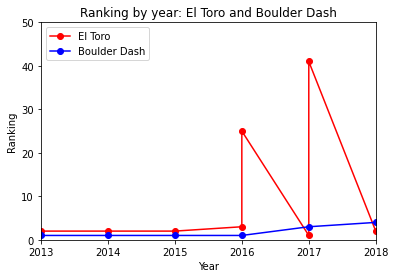

In [16]:
#The function will be similar to the previous one, but here it is important to label each line. 
#This can be included on our function.
def tworc_ranking(name1,name2,df):
    df1 = df[df.Name==name1]
    df2 = df[df.Name==name2]
    ax = plt.subplot(1,1,1)
    ax.invert_yaxis()
    plt.plot(df1.Year,df1.Rank, marker = 'o', color = 'Red', label = name1)
    plt.plot(df2.Year,df2.Rank, marker = 'o', color = 'Blue', label = name2)
    plt.axis([2013,2018,0,50])
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title('Ranking by year: ' + name1 + " and " + name2)
    plt.legend(loc = 2)
    plt.show()

#Let's try it out:
tworc_ranking("El Toro", "Boulder Dash", df_wood)

Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. Your function should take a number n and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

For example, if n == 5, your function should plot a line for each roller coaster that has a rank of 5 or lower.

Call your function with a value for n and either the wood ranking or steel ranking DataFrame.

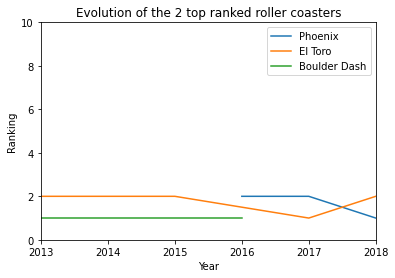

In [17]:
#To solve this, we need to iterate inside our function to make one line for each roller coaster that fits into our statement.
#It is important to correctly label each line.

def top_rc(n,df):
    df1 = df[df.Rank <= n].reset_index()
    ax = plt.subplot(1,1,1)
    ax.invert_yaxis()
    for rc in set(df1.Name):
        rc_rankings = df1[df1['Name'] == rc]
        plt.plot(rc_rankings['Year'], rc_rankings['Rank'], label = rc)
    plt.axis([2013,2018,0,10])
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend()
    plt.title('Evolution of the ' + str(n) + " top ranked roller coasters")
    plt.show()
    

#We call this function to take a look of all the lines we require:    
top_rc(2,df_wood)

Now that you’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. Captain Coaster is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in roller_coasters.csv. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [18]:
#First, we must save the file into a DataFrame, and then call it to get a hint of how it is like
df_actual = pd.read_csv('roller_coasters.csv')
df_actual.head(5)

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [19]:
#Let's dig into its info
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB


In [20]:
#It´s our turn to look into some insightful data. Hoy many of the roller coasters are operating? 
#How is the situation for the other ones?
df_actual.groupby('status').name.count()

status
status.announced               39
status.closed.definitely      439
status.closed.temporarily      25
status.construction            41
status.operating             2172
status.relocated               22
status.retracked               16
status.rumored                 11
status.unknown                 34
Name: name, dtype: int64

In [21]:
#Which is the one that achieves the highest speed?
max_speed= df_actual.speed.max()
max_speed_coaster = df_actual[df_actual.speed==max_speed]
print(max_speed_coaster[['name', 'speed']])
                          

               name  speed
1397  Formula Rossa  240.0


In [22]:
#Which is the roller coaster ride with more length?
max_length= df_actual.length.max()
max_length_coaster = df_actual[df_actual.length==max_length]
print(max_length_coaster[['name', 'length']])

                name  length
2645  Alpine-Coaster  2920.0


In [23]:
#Finally, let's count how many roller coasters are made of wood and hoy many are made of steel. 
#We will find out that there are 531 entries that were not defined as any of the material types:
df_actual.groupby('material_type').count()

,name,seating_type,speed,height,length,num_inversions,manufacturer,park,status
material_type,,,,,,,,,
Hybrid,21,21,19,20,19,20,21,21,21
Steel,2058,2059,1174,1309,1281,2026,2059,2059,2059
Wooden,189,189,153,174,172,169,189,189,189
na,531,533,132,164,203,190,533,533,533


Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and one of the column names.

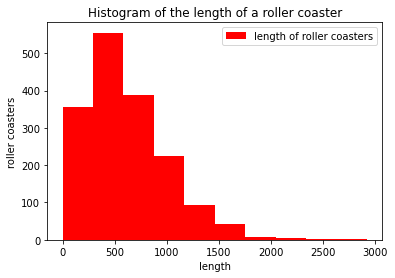

In [24]:
#This is one way we can create the function to show a histogram of a given column name and a DataFrame:

def coaster_histogram(df,column_name):
    data_to_work_on = df[column_name]
    plt.hist(data_to_work_on.dropna(), color = "red")
    plt.xlabel(column_name)
    plt.ylabel('roller coasters')
    plt.legend([column_name + " of roller coasters"])
    plt.title("Histogram of the " + column_name + " of a roller coaster")
    plt.show()
    
    
    
coaster_histogram(df_actual,'length')

Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and an amusement park name.

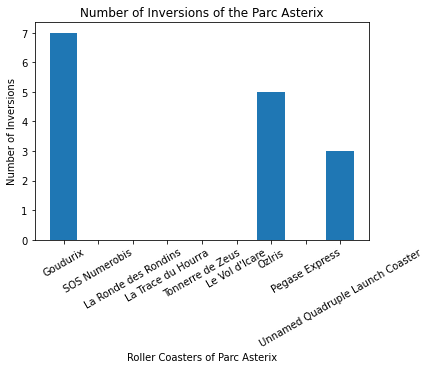

In [25]:
#Now, it is our turn to make a bar graph, with the number of inversions for a given amusement park. 
#It is important to rotate the labels of the x-axis, because if can be very hard to read otherwise.

def coaster_inversions_bar(df,park):
    data_to_work_on = df[df.park == park]
    ax = plt.subplot(1,1,1)
    plt.bar(data_to_work_on.name, data_to_work_on.num_inversions)
    ax.set_xticks(data_to_work_on.name)
    ax.set_xticklabels(data_to_work_on.name, rotation = 30)
    plt.xlabel("Roller Coasters of " + park)
    plt.ylabel("Number of Inversions")
    plt.title("Number of Inversions of the " + park)
    plt.show()
    
    
    
coaster_inversions_bar(df_actual,"Parc Asterix")

Write a function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely'). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame.

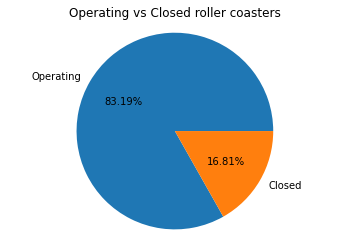

In [26]:
#To make this pie chart, we can start making two variables to work on.
#Then it is a must to correctly label each one in the plot.

def operating_rc(df):
    operating_rc = df[df.status == 'status.operating']
    closed_rc = df[df.status == 'status.closed.definitely']
    counts = len(operating_rc), len(closed_rc)
    ax=plt.subplot(1,1,1)
    plt.pie(counts, labels = (['Operating', 'Closed']), autopct='%0.2f%%')   
    plt.axis('equal')
    plt.title('Operating vs Closed roller coasters')
    plt.show()

operating_rc(df_actual)

.scatter() is another useful function in matplotlib that you might not have seen before. .scatter() produces a scatter plot, which is similar to .plot() in that it plots points on a figure. .scatter(), however, does not connect the points with a line. This allows you to analyze the relationship between to variables. Find .scatter()‘s documentation here.

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

Call your function with the roller coaster DataFrame and two-column names.

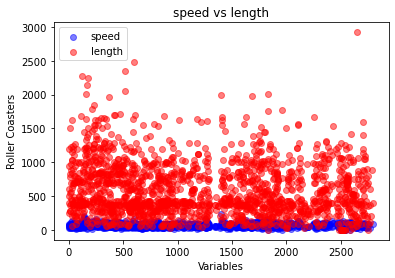

None


In [27]:
#This scatter plot is only possible if we define the x variable first.
#Then, we scatter each of the two columns in the same graph.

def scatter_rc(df,column1,column2):
    c1 = df[column1]
    c2 = df[column2]
    x = range(len(df))
    ax = plt.subplot(1,1,1)
    plt.scatter(x,c1, alpha = 0.5, color = 'blue', label = column1)
    plt.scatter(x,c2, alpha = 0.5, color = 'red', label = column2)
    plt.xlabel('Variables')
    plt.ylabel('Roller Coasters')
    plt.title(column1 + " vs " + column2)
    plt.legend()
    plt.show()
    
    
print(scatter_rc(df_actual,'speed', 'length'))